In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib as plt


In [15]:
fbdata = pd.read_csv('./fb5.csv', skipinitialspace=True, low_memory=False)
goog= pd.read_csv('./googl5.csv', skipinitialspace=True, low_memory=False)
aapl= pd.read_csv('./aapl5.csv', skipinitialspace=True, low_memory=False)
amzn= pd.read_csv('./amzn5.csv', skipinitialspace=True, low_memory=False)
tesla= pd.read_csv('./tsla5.csv', skipinitialspace=True, low_memory=False)
nf= pd.read_csv('./nflx5.csv', skipinitialspace=True, low_memory=False)


In [16]:
fbdata['Date'] = pd.to_datetime(fbdata['Date'])  ##tell pandas its a date
fbdata.set_index('Date', inplace=True)

fbdata['Year'] = fbdata.index.year
fbdata['Month'] = fbdata.index.month

goog['Date'] = pd.to_datetime(goog['Date'])  ##tell pandas its a date
goog.set_index('Date', inplace=True)

goog['Year'] = goog.index.year
goog['Month'] = goog.index.month

aapl['Date'] = pd.to_datetime(aapl['Date'])  ##tell pandas its a date
#aapl['Year'] = aapl.index.year
#aapl['Month'] = aapl.index.month
aapl.set_index('Date', inplace=True)

aapl['Year'] = aapl.index.year
aapl['Month'] = aapl.index.month

amzn['Date'] = pd.to_datetime(amzn['Date'])  ##tell pandas its a date
amzn.set_index('Date', inplace=True)
amzn['Year'] = amzn.index.year
amzn['Month'] = amzn.index.month


tesla['Date'] = pd.to_datetime(tesla['Date'])  ##tell pandas its a date
tesla.set_index('Date', inplace=True)
tesla['Year'] = tesla.index.year
tesla['Month'] = tesla.index.month

nf['Date'] = pd.to_datetime(nf['Date'])  ##tell pandas its a date
nf.set_index('Date', inplace=True)
nf['Year'] = nf.index.year
nf['Month'] = nf.index.month

##I'm going to end up with like 20 of these, so I'm going to need to figure out a way to automate these steps

In [20]:
aapl['abspc_change']=(abs((aapl['Open'] - aapl['Close'])/aapl['Open'] ))*100
aapl['change']=(aapl['Open'] - aapl['Close'])
aapl['pc_change']=(aapl['Open'] - aapl['Close'])/aapl['Open']*100

tesla['abspc_change']=(abs((tesla['Open'] - tesla['Close'])/tesla['Open'] ))*100
tesla['change']=(tesla['Open'] - tesla['Close'])
tesla['pc_change']=(tesla['Open'] - tesla['Close'])/tesla['Open']*100

amzn['abspc_change']=(abs((amzn['Open'] - amzn['Close'])/amzn['Open'] ))*100
amzn['change']=(amzn['Open'] - amzn['Close'])
amzn['pc_change']=(amzn['Open'] - amzn['Close'])/amzn['Open']*100




In [21]:
####this is the same exact code cut and pasted, why does this one give me an error?

nf['change']=(nf['Open'] - nf['Close'])
nf['pc_change']=(nf['Open'] - nf['Close'])/nf['Open']*100
nf['abspc_change']=(abs((nf['Open'] - nf['Close'])/nf['Open'] ))*100

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

In [33]:
goog['abspc_change']=(abs((goog['Open'] - goog['Close'])/goog['Open'] ))*100
goog['change']=(goog['Open'] - goog['Close'])
goog['pc_change']=(goog['Open'] - goog['Close'])/goog['Open']*100




In [18]:
nf.head(2)


,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2017-06-28,151.64,154.20,150.12,153.41,5589883,2017,6
2017-06-27,156.62,156.98,150.72,151.03,7424252,2017,6


In [ ]:
techs=pd.concat([fbdata, aapl, goog, nf, amzn, tesla])
techs= techs.groupby(techs.index).mean()



In [27]:
techs.head(2)

,Close,High,Low,Month,Volume,Year,abspc_change,change,pc_change
Date,,,,,,,,,
2012-06-28,31.41,32.110000,30.620,6.0,9.140400e+05,2012.0,1.536050,0.49,1.53605
2012-06-29,112.38,112.791667,110.575,6.0,2.535714e+07,2012.0,2.423196,-1.00,0.64591


In [83]:
svr_lin=SVR(kernel='linear', C=1e3)
svr_poly=SVR(kernel='poly', C=1e3, degree=2)
svr_rbf=SVR(kernel='rbf', C=1e3, gamma=.1)
svr_lin.fit(aapl['Volume'], aapl['Close'])
svr_poly.fit(aapl['Volume'], aapl['Close'])
svr_rbf.fit(aapl['Volume'], aapl['Close'])

plt.plot(aapl['Volume'], aapl['Close'], color='black')
plt.plot(aapl['Volume'], svr_rbf.predict(aapl['Date'], color='red'))



C:\Users\ewa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 1257]

In [5]:
### i'm debating different things to look at.  Maybe I want to look at days of high trading volumes and see if i can predict 
the direction or if it happens


SyntaxError: invalid syntax (<ipython-input-5-4a5636c894f7>, line 2)

In [34]:
goog['pc_change'].describe()

count    1257.000000
mean        0.006437
std         1.079962
min        -3.992623
25%        -0.654477
50%        -0.007426
75%         0.572086
max         8.012693
Name: pc_change, dtype: float64

In [7]:
aapl.describe()
aapl['Volume'].describe()
aaplhv=aapl[aapl.Volume > 8.387052e+07]  ##arbitrarily using the 
print aaplhv.head()

              Open    High     Low   Close     Volume  Year  Month  \
Date                                                                 
2017-02-01  127.03  130.49  127.01  128.75  111985040  2017      2   
2016-09-15  113.86  115.73  113.49  115.57   90613177  2016      9   
2016-09-14  108.73  113.03  108.60  111.77  112340318  2016      9   
2016-07-27  104.26  104.35  102.75  102.95   92344820  2016      7   
2016-04-27   96.00   98.71   95.68   97.82  113538389  2016      4   

            abspc_change  change  pc_change  
Date                                         
2017-02-01      1.354011   -1.72  -1.354011  
2016-09-15      1.501844   -1.71  -1.501844  
2016-09-14      2.795916   -3.04  -2.795916  
2016-07-27      1.256474    1.31   1.256474  
2016-04-27      1.895833   -1.82  -1.895833  


In [8]:
##what you see here is largely a train of thought, when i figoure out how to automate these tasks theyll be at part 1

#aaplhv['pc_change']=(aaplhv['Open'] - aaplhv['Close'])/aaplhv['Open'] 
#aaplhv['abspc_change']=abs((aaplhv['Open'] - aaplhv['Close'])/aaplhv['Open'] )
aaplhv.head()

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change
Date,,,,,,,,,,
2017-02-01,127.03,130.49,127.01,128.75,111985040,2017,2,1.354011,-1.72,-1.354011
2016-09-15,113.86,115.73,113.49,115.57,90613177,2016,9,1.501844,-1.71,-1.501844
2016-09-14,108.73,113.03,108.60,111.77,112340318,2016,9,2.795916,-3.04,-2.795916
2016-07-27,104.26,104.35,102.75,102.95,92344820,2016,7,1.256474,1.31,1.256474
2016-04-27,96.00,98.71,95.68,97.82,113538389,2016,4,1.895833,-1.82,-1.895833


In [36]:

#data['Year'].head
import seaborn as sb
%matplotlib inline


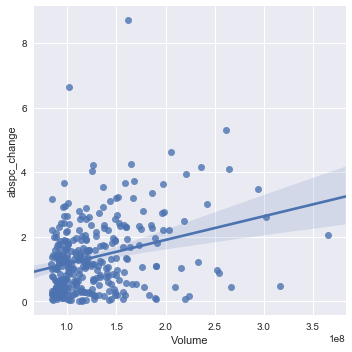

In [11]:
sb.lmplot(x="Volume", y="abspc_change", data=aaplhv)

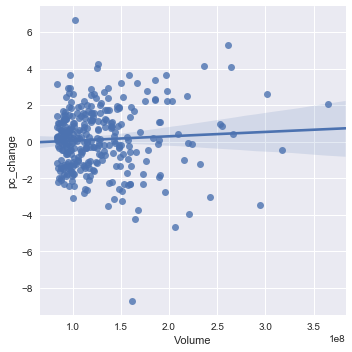

In [12]:
sb.lmplot(x="Volume", y="pc_change", data=aaplhv)

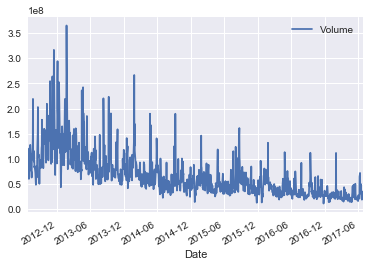

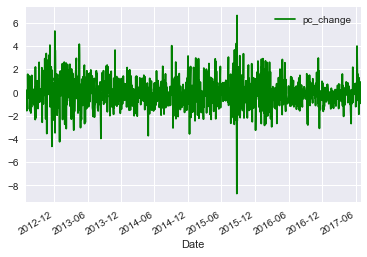

In [13]:
ax=aapl[['Volume']].plot()
aapl[['pc_change']].plot( color='green')



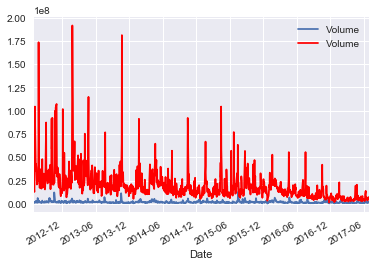

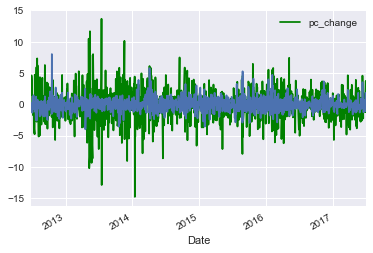

In [37]:
ax=goog[['Volume']].plot()  ###defense company 1
nf[['Volume']].plot(ax=ax, color="red")  ###defense company 2
ax2=tesla[['pc_change']].plot( color='green')
#ng[['Volume']].plot(ax=ax)  ###defense company 2
goog['pc_change'].plot()



In [15]:
from scipy import stats
#stats.pearsonr(ng['Volume'], lll['Volume']) #.24, 2.59e-18
               
stats.pearsonr(ng['pc_change'], lll['pc_change'])



(0.54343888061064882, 1.6953398259096635e-97)

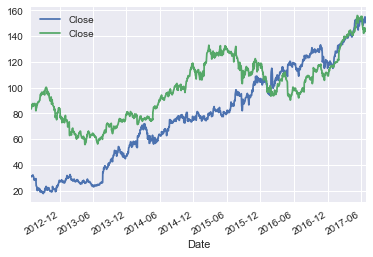

In [16]:
#fbdata[['Close']].plot()
ax=fbdata[['Close']].plot()
#goog[['Close']].plot(ax=ax)
#goog[['Close']].plot()
aapl[['Close']].plot(ax=ax)


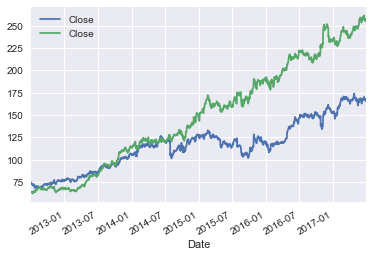

In [17]:
#fbdata[['Close']].plot()
ax=lll[['Close']].plot()
#goog[['Close']].plot(ax=ax)
#goog[['Close']].plot()
ng[['Close']].plot(ax=ax)



In [ ]:
from TwitterAPI import TwitterAPI
access_token_key = "4879594762-f1l7flCgkbCqHDRrMy2S24wiTfU4fPvtyGy4JTp"
access_token_secret = "6GjVgHKGijy1Nf0pbkuAos60BxVBPmouhpoZM146SGmBj"

api_key = "yjEfKLHbzjcSTPPjklfVodAeI"
api_secret = "Z0z4M5PNC4hwXB82CI7JuVRttsgPiOckXxdXLH9LnUeICylrMR"

_debug = 0


api = TwitterAPI(api_key, api_secret, access_token_key, access_token_secret)

'''
Construct, sign, and open a twitter request
using the hard-coded credentials above.
'''

def retrieve_tweets(Apple, 
                    url="https://stream.twitter.com/1/statuses/filter.json", 
                    method="GET", ):
    """

    Params:
    topic - must be in this format "#topic" or '@handle"
    Returns
    """
    response = api.request('statuses/filter', {'track': topic})
    if response.status_code != 200:
        raise ValueError("Unable to retrieve tweets, please check your API credentials")
    for x in response:
        try:
            yield x
        except UnicodeError as unicode_error:
            continue            
            
            
            

In [ ]:
r = api.request('statuses/update', {'status':'This is a testing!'})
print (r.status_code) 

print (r.text)



In [ ]:
r = api.request('search/tweets', {'q': "Trump"})

for item in r:
    print(item['text'] if 'text' in item else item)

print('\nQUOTA: %s' % r.get_rest_quota())

In [ ]:
import twitter
dir(twitter)
#tweets=twitter.retrieve_tweets("Apple", url="https://stream.twitter.com/1/statuses/filter.json" )
results = api.GetSearch(
    raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=100")



In [ ]:
from __future__ import print_function
import sys

import twitter

if __name__ == '__main__':
    results = twitter.retrieve_tweets(topic=sys.args[1])
    out = open('../dataset/captured-tweets.txt', 'ab')
    # The tweet is stored with key 'text',
    i = 0
    for result in results:
        # Filter to english tweets
        if result['lang'] == 'en':
            out.write((result['text'] + "\n").encode('utf-8'))
            i += 1
        # Defaulting to capturing 5000, this takes a long time...
        if i == 5000:
            exit()

In [ ]:
#3. Run `python capture-tweets.py <topic>` to save tweets to file called `captured-tweets.txt` related to 
#`<topic>`. I.e.: `python capture-tweets.py Google` or `python capture-tweets.py Iran`

capture-tweets.py(Apple)

